In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv(r'C:\Users\HP\Desktop\blogposts\tech\LSTM\airline-passengers.csv',
                      usecols = [0,1], 
                      engine = "python", 
                      skipfooter = 3)

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()

,Month,Passengers
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508


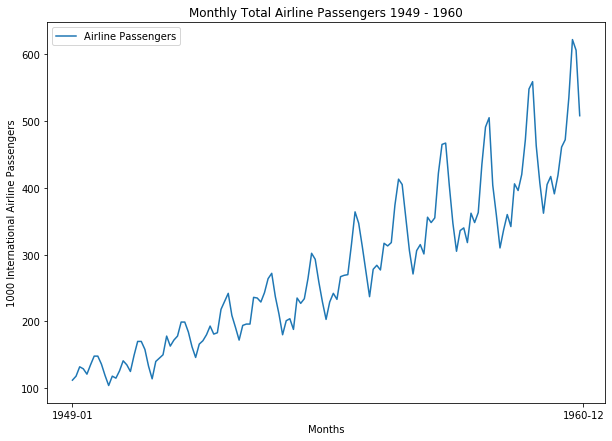

In [5]:
plt.figure(figsize=(10, 7))

plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.plot(data['Month'],data['Passengers'], markersize=3, label = "Airline Passengers")

xvals=['1949-01','1960-12']
plt.xticks(xvals)
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.legend()
plt.show()

In [6]:
data_chosen=data = pd.read_csv(r'C:\Users\HP\Desktop\blogposts\tech\LSTM\airline-passengers.csv',
                      usecols = [1], 
                      engine = "python", 
                      skipfooter = 3)
print(data_chosen)

     Passengers
0           112
1           118
2           132
3           129
4           121
5           135
6           148
7           148
8           136
9           119
10          104
11          118
12          115
13          126
14          141
15          135
16          125
17          149
18          170
19          170
20          158
21          133
22          114
23          140
24          145
25          150
26          178
27          163
28          172
29          178
..          ...
111         348
112         363
113         435
114         491
115         505
116         404
117         359
118         310
119         337
120         360
121         342
122         406
123         396
124         420
125         472
126         548
127         559
128         463
129         407
130         362
131         405
132         417
133         391
134         419
135         461
136         472
137         535
138         622
139         606
140         508

[141 ro

In [7]:
# Get the raw data values from the pandas data frame.
data_raw = data_chosen.values.astype("float32")

# We apply the MinMax scaler from sklearn                           
# to normalize data in the (0, 1) interval.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

In [8]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (84, 57)


In [9]:

def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [10]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(82, 1)
New training data shape:
(82, 1, 1)


In [11]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

In [12]:
window_size=1

model = Sequential()
    
model.add(LSTM(4, input_shape = (1, window_size)))
    
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(loss = "mean_squared_error", optimizer = "adam")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
results= model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0318
Epoch 2/100
 - 0s - loss: 0.0151
Epoch 3/100
 - 0s - loss: 0.0130
Epoch 4/100
 - 0s - loss: 0.0127
Epoch 5/100
 - 0s - loss: 0.0111
Epoch 6/100
 - 0s - loss: 0.0109
Epoch 7/100
 - 0s - loss: 0.0101
Epoch 8/100
 - 0s - loss: 0.0112
Epoch 9/100
 - 0s - loss: 0.0101
Epoch 10/100
 - 0s - loss: 0.0100
Epoch 11/100
 - 0s - loss: 0.0089
Epoch 12/100
 - 0s - loss: 0.0096
Epoch 13/100
 - 0s - loss: 0.0089
Epoch 14/100
 - 0s - loss: 0.0076
Epoch 15/100
 - 0s - loss: 0.0086
Epoch 16/100
 - 0s - loss: 0.0067
Epoch 17/100
 - 0s - loss: 0.0058
Epoch 18/100
 - 0s - loss: 0.0062
Epoch 19/100
 - 0s - loss: 0.0056
Epoch 20/100
 - 0s - loss: 0.0070
Epoch 21/100
 - 0s - loss: 0.0055
Epoch 22/100
 - 0s - loss: 0.0055
Epoch 23/100
 - 0s - loss: 0.0054
Epoch 24/100
 - 0s - loss: 0.0053
Epoch 25/100
 - 0s - loss: 0.0049
Epoch 26/100
 - 0s - loss: 0.0039
Epoch 27/100
 - 0s - loss: 0.0032
Epoch 28/100
 - 0s - loss: 0.0054
Epoch 29/

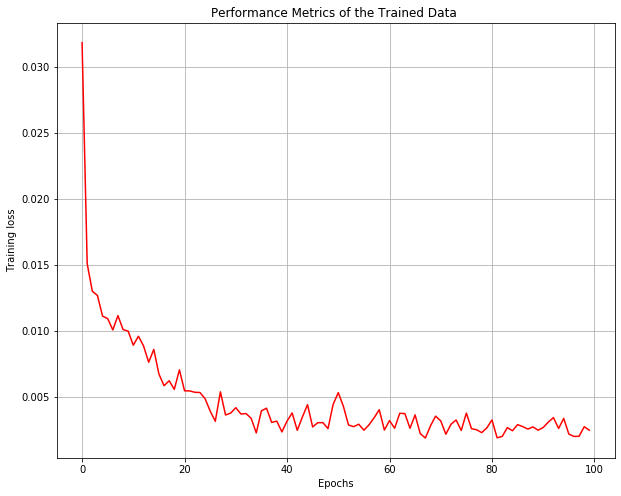

In [14]:
plt.figure(figsize=(10,8))
plt.title("Performance Metrics of the Trained Data ")
plt.plot(results.history['loss'], color='r', markersize=3)
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [24]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(4, 
                   input_shape = (1, window_size)))
    
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)

In [25]:
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/100
 - 1s - loss: 0.0417
Epoch 2/100
 - 0s - loss: 0.0235
Epoch 3/100
 - 0s - loss: 0.0159
Epoch 4/100
 - 0s - loss: 0.0138
Epoch 5/100
 - 0s - loss: 0.0132
Epoch 6/100
 - 0s - loss: 0.0122
Epoch 7/100
 - 0s - loss: 0.0119
Epoch 8/100
 - 0s - loss: 0.0117
Epoch 9/100
 - 0s - loss: 0.0104
Epoch 10/100
 - 0s - loss: 0.0101
Epoch 11/100
 - 0s - loss: 0.0098
Epoch 12/100
 - 0s - loss: 0.0095
Epoch 13/100
 - 0s - loss: 0.0081
Epoch 14/100
 - 0s - loss: 0.0088
Epoch 15/100
 - 0s - loss: 0.0067
Epoch 16/100
 - 0s - loss: 0.0064
Epoch 17/100
 - 0s - loss: 0.0063
Epoch 18/100
 - 0s - loss: 0.0071
Epoch 19/100
 - 0s - loss: 0.0047
Epoch 20/100
 - 0s - loss: 0.0041
Epoch 21/100
 - 0s - loss: 0.0044
Epoch 22/100
 - 0s - loss: 0.0042
Epoch 23/100
 - 0s - loss: 0.0030
Epoch 24/100
 - 0s - loss: 0.0038
Epoch 25/100
 - 0s - loss: 0.0026
Epoch 26/100
 - 0s - loss: 0.0032
Epoch 27/100
 - 0s - loss: 0.0022
Epoch 28/100
 - 0s - loss: 0.0028
Epoch 29/100
 - 0s - loss: 0.0033
Epoch 30/100
 - 0s - lo

In [26]:
from sklearn.metrics import mean_squared_error

def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 21.18 RMSE
Test data score: 52.42 RMSE


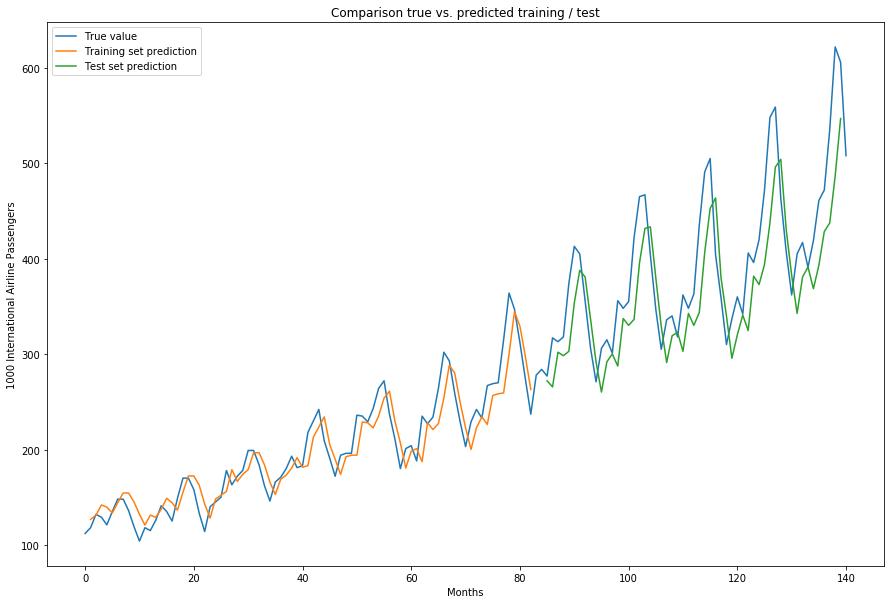

In [27]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 10))
plt.plot(scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()